In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

plt.rc('font', family='Malgun Gothic')
plt.rc("axes", unicode_minus = False)

# Read the Dataset

## File info
- 문서 앱내 사용시 발생하는 클라이언트 로그 데이터 (after parsed)
- 서버로그와 달리, 유저의 행동이 발생할 경우 로그 수집 (유저 행동 패턴 파악에 용이)

In [2]:
df = pd.read_csv('data/df_funnel.csv')
df.shape

(301861, 8)

## Columns info
- actiontype: 문서 이용시 행동(OPEN, CLOSE, SAVE,,)
- ismydoc: 내문서 해당 여부(중요x)
- ext: 문서 확장자
- sessionid: 유저 식별자
- documentposition: 문서 이용시 위치 정보(CLOUD, OTHERAPP)
- datetime
- screen: 앱내 화면 이름

In [3]:
df.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301861 entries, 0 to 301860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        301861 non-null  int64 
 1   actiontype        301861 non-null  object
 2   ismydoc           301861 non-null  object
 3   ext               301861 non-null  object
 4   sessionid         301861 non-null  object
 5   documentposition  301861 non-null  object
 6   datetime          301861 non-null  object
 7   screen            301861 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.4+ MB


# 데이터 전처리
- 데이터 타입 변환
- 데이터 값 변경
- 결측치 처리
- 신규 session id 부여
- 대소문자 처리

## datetime 컬럼의 타입형태 변환하기

In [5]:
df['datetime'].value_counts()

2016.7.12    12340
2016.7.13    12159
2016.7.26    12034
2016.7.20    11912
2016.7.19    11872
2016.7.1     11836
2016.7.14    11721
2016.7.21    11599
2016.7.27    11593
2016.7.22    11250
2016.7.28    11216
2016.7.15    11057
2016.7.5     10988
2016.7.29    10721
2016.7.6     10525
2016.7.8     10522
2016.7.7     10153
2016.7.25    10081
2016.7.11    10075
2016.7.18     9987
2016.7.4      9260
2016.7.2      8884
2016.7.16     8513
2016.7.23     8390
2016.7.9      8283
2016.7.30     8087
2016.7.17     6906
2016.7.24     6813
2016.7.10     6750
2016.7.3      6334
Name: datetime, dtype: int64

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301861 entries, 0 to 301860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        301861 non-null  int64         
 1   actiontype        301861 non-null  object        
 2   ismydoc           301861 non-null  object        
 3   ext               301861 non-null  object        
 4   sessionid         301861 non-null  object        
 5   documentposition  301861 non-null  object        
 6   datetime          301861 non-null  datetime64[ns]
 7   screen            301861 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 18.4+ MB


## df에 요일 컬럼 생성하기

In [8]:
df['요일'] = df['datetime'].apply(lambda x : x.weekday())

## 결측치 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301861 entries, 0 to 301860
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        301861 non-null  int64         
 1   actiontype        301861 non-null  object        
 2   ismydoc           301861 non-null  object        
 3   ext               301861 non-null  object        
 4   sessionid         301861 non-null  object        
 5   documentposition  301861 non-null  object        
 6   datetime          301861 non-null  datetime64[ns]
 7   screen            301861 non-null  object        
 8   요일                301861 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 20.7+ MB


In [10]:
df.isnull().sum()

# 결측치 없음

Unnamed: 0          0
actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
요일                  0
dtype: int64

## 확장자명 통일

In [11]:
df['ext'].value_counts()

PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: ext, dtype: int64

In [12]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

df['ext'] = df['ext'].replace(ext_dic)

df['ext'].value_counts()

DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: ext, dtype: int64

## Action type 통일

In [13]:
df['actiontype'].value_counts()

OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: actiontype, dtype: int64

In [14]:
act_dic = {'SAVEAS': 'SAVE',
           'SAVEAS_OTHER': 'SAVE',
           'EXPORT_SAME': 'EXPORT'
            }

df['actiontype'] = df['actiontype'].replace(act_dic)

df['actiontype'].value_counts()

OPEN      151802
CLOSE     127922
SAVE       14299
RESET       7751
EXPORT        87
Name: actiontype, dtype: int64

## session_id 간소화

In [15]:
s=[]
c=0

for i in range(len(df)-1):
    if df.loc[i,'sessionid'] == df.loc[i+1,'sessionid']:
        s.append(c)
    else:
        s.append(c)
        c += 1

In [16]:
s[:20]

[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7]

In [17]:
df['sessionid'] = pd.Series(['sess'+str(x) for x in s])

In [18]:
df['sessionid'].fillna(df['sessionid'][len(df)-2],inplace=True)

In [19]:
df

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,요일
0,0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
1,1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0
2,2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
3,3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0
4,4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2
...,...,...,...,...,...,...,...,...,...
301856,301856,CLOSE,View,XLS,sess132151,OTHERAPP,2016-07-07,Main,3
301857,301857,OPEN,NoView,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301858,301858,RESET,View,DOC,sess132152,OTHERAPP,2016-07-05,Main,1
301859,301859,OPEN,NoView,PPT,sess132153,OTHERAPP,2016-07-14,Main,3


# EDA ( 탐색적 데이터 분석)
- 일별 주요 통계
- 변수별 특성
- 구간별 전환율 (Funnel Analysis)
- 클러스터링
- 클러스터별 전환율 차이 파악

## 일별 Trend
- 탐색내용
    - 일별 로그 카운트
    - 일별 세션 카운트
    - 요일별 세션 카운트

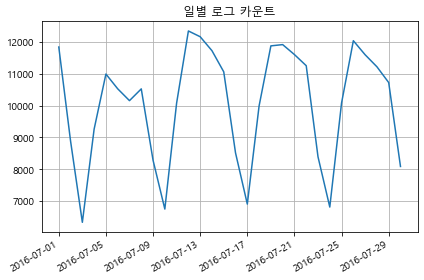

In [20]:
df['datetime'].value_counts().plot()
plt.title('일별 로그 카운트')
plt.grid()
plt.tight_layout()

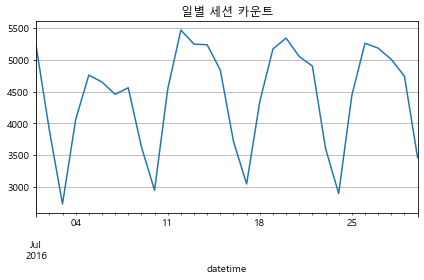

In [21]:
df.groupby("datetime")['sessionid'].nunique().plot()
plt.title('일별 세션 카운트')
plt.grid()
plt.tight_layout()

- 앱 사용에 주기성 존재
- 로그수와 세션수의 트렌드가 유사

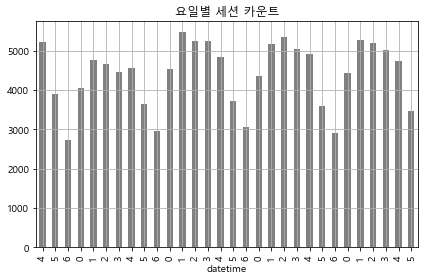

In [22]:
dsc = df.groupby("datetime")['sessionid'].nunique()
dsc.index = dsc.index.dayofweek
dsc.plot.bar(color='grey')
plt.title("요일별 세션 카운트")
plt.grid()
plt.tight_layout()

- 주말에 앱 사용이 감소하고 주중 초반이 높은편
- 문서 앱이라는 특성상, 직장인이나 학생이 주로 사용할 것으로 가정하면 당연한 결과

- 탐색 내용
    - 일별, 확장자별 로그수
    - 일별, 위치별 로그수
    - 일별, 액션별 로그수
    - 일별, 화면 스크린별 유니크 유저수

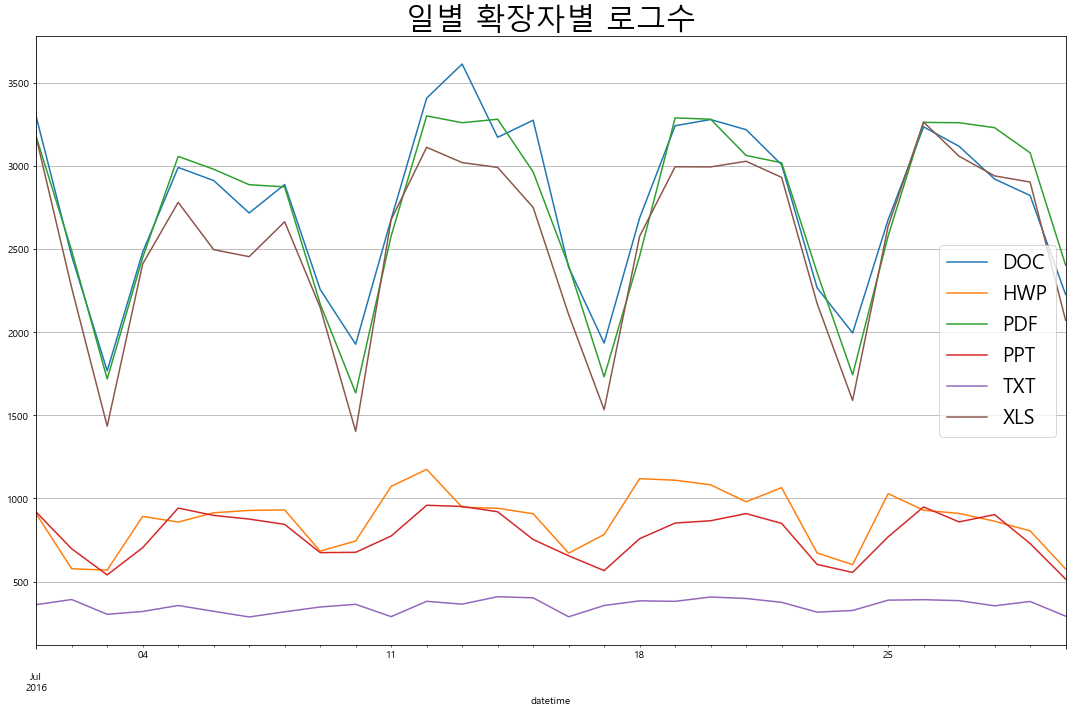

In [23]:
df.groupby(['datetime','ext']).size().unstack().dropna(axis=1).plot(figsize=(15,10))
plt.title("일별 확장자별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

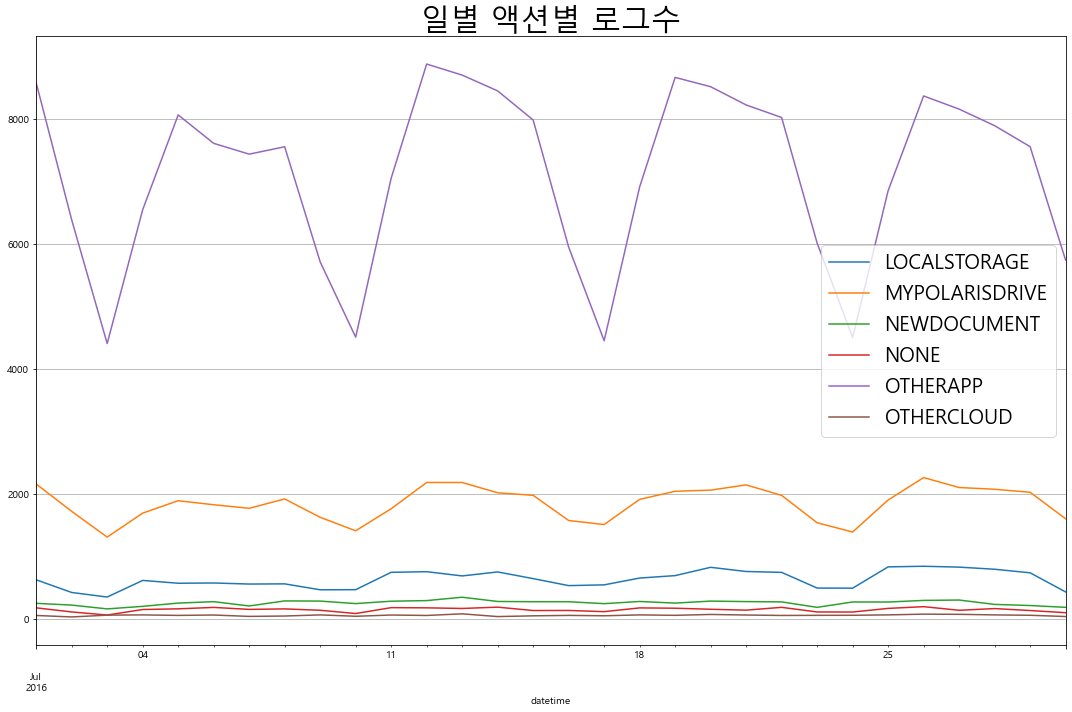

In [24]:
df.groupby(["datetime", "documentposition"]).size().unstack().dropna(axis=1).plot(figsize=(15,10));
plt.title("일별 액션별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

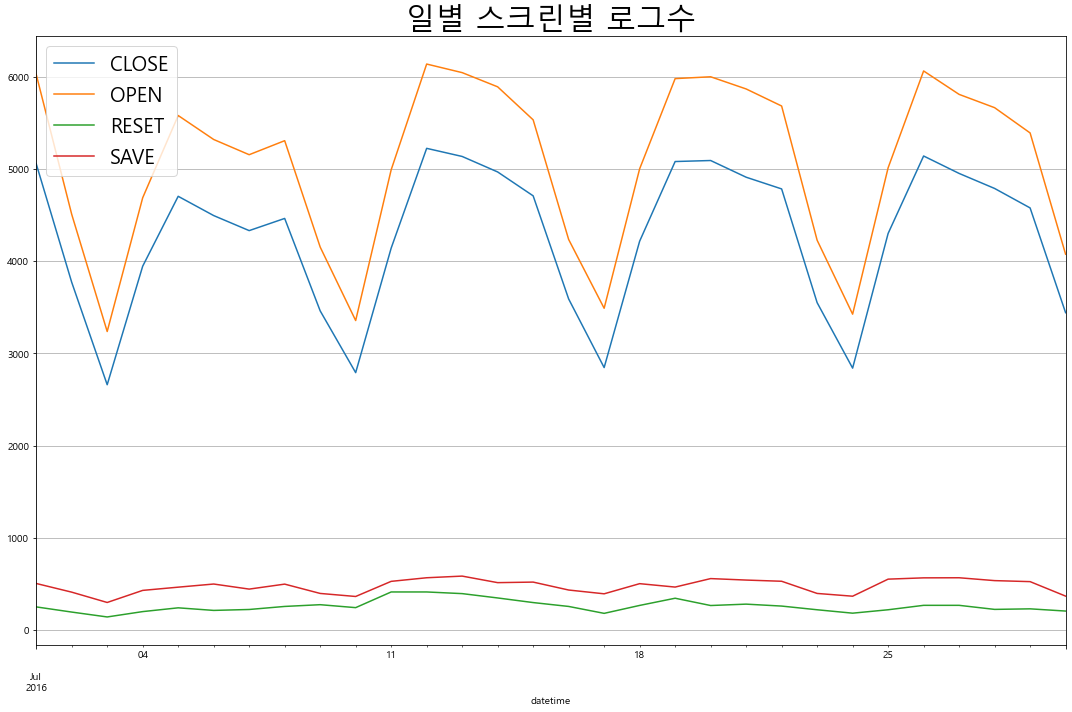

In [25]:
df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot(figsize=(15,10))
plt.title("일별 스크린별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

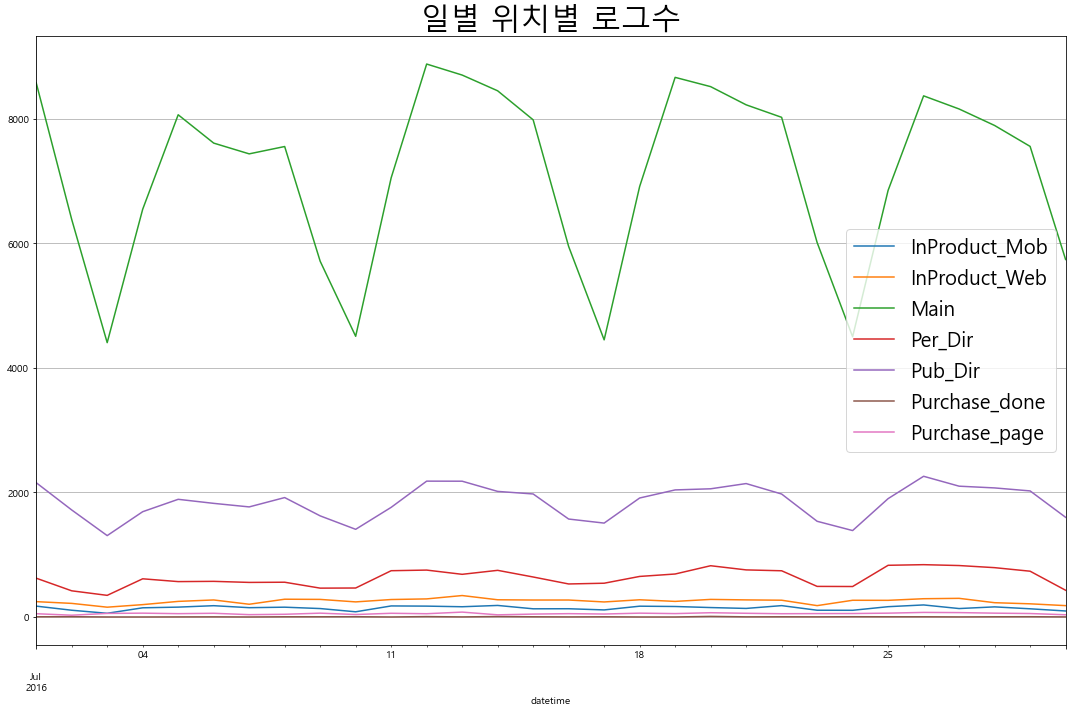

In [26]:
df.groupby(["datetime", "screen"]).size().unstack().fillna(0).plot(figsize=(15,10))
plt.title("일별 위치별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

In [27]:
screens = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack().fillna(0).astype(int)
screens = screens[screens.mean().sort_values(ascending=False).index]
screens[:10]

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1
2016-07-06,3525,949,374,163,148,31,1
2016-07-07,3433,896,324,133,127,18,0
2016-07-08,3477,961,339,169,127,23,2
2016-07-09,2605,865,277,178,110,30,2


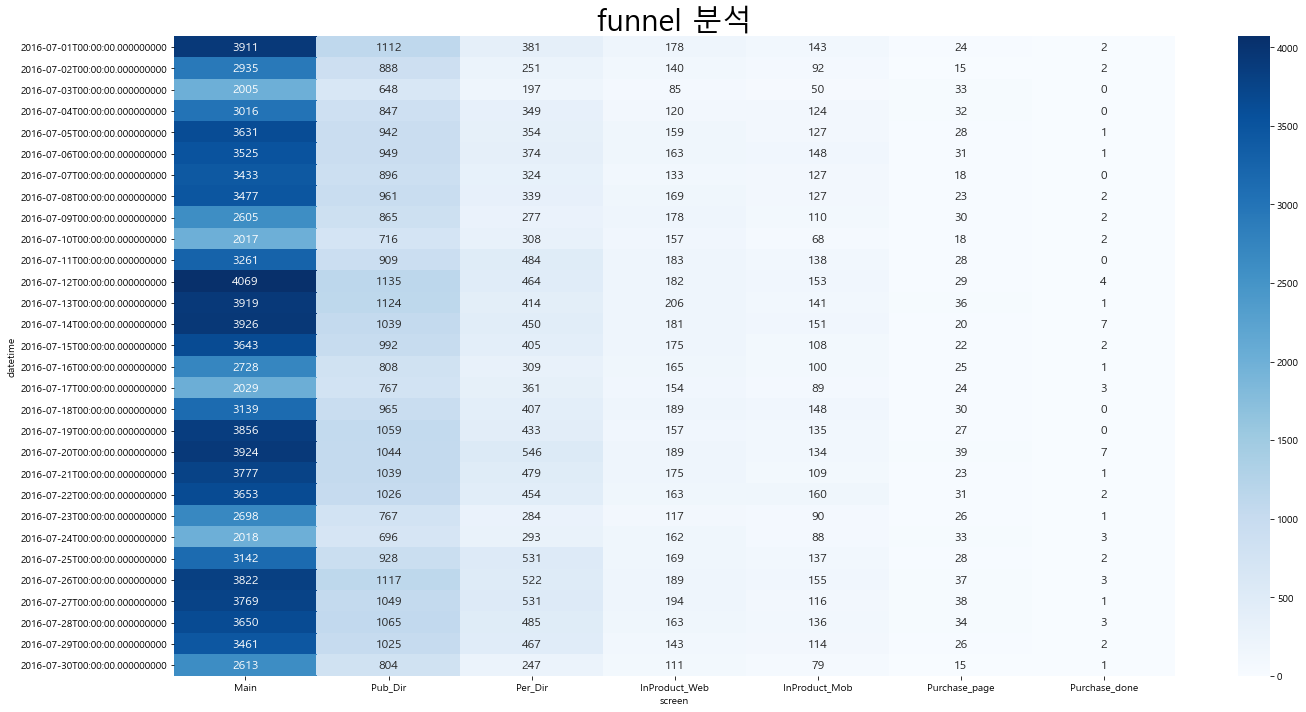

In [35]:
plt.subplots(figsize=(20,10))

sns.heatmap(screens, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues');

plt.title("funnel 분석",fontsize=30)
plt.tight_layout()

- doc, pdf, xls 순으로 주로 사용
- 주요 문서 이용 위치는 otherapp
- Main -> 구매완료(purchase_done) 까지 과정에서 대부분 이탈

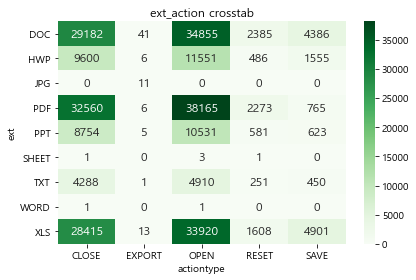

In [36]:
ext_action = df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(ext_action, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Greens')
plt.title("ext_action crosstab")
plt.tight_layout()

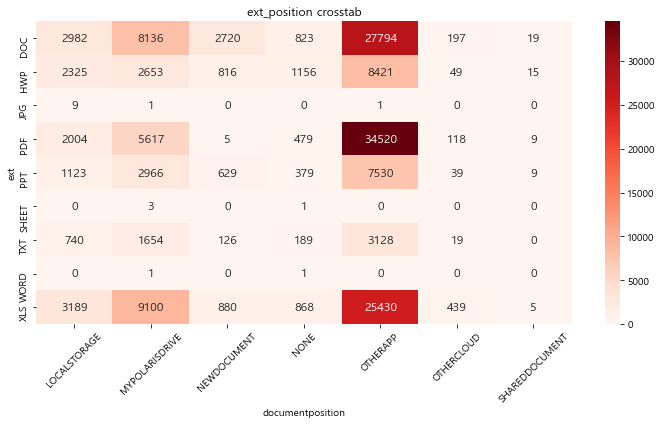

In [39]:
plt.subplots(figsize=(10,6))

ext_pos = df.groupby(["ext", "documentposition"])['sessionid'].nunique().unstack().fillna(0).astype(int)

sns.heatmap(ext_pos, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Reds');

plt.title("ext_position crosstab")
plt.xticks(rotation = 45)
plt.tight_layout()

## 구간별 전환율 Trend
- Funnel 분석

In [41]:
screens.head()

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3911,1112,381,178,143,24,2
2016-07-02,2935,888,251,140,92,15,2
2016-07-03,2005,648,197,85,50,33,0
2016-07-04,3016,847,349,120,124,32,0
2016-07-05,3631,942,354,159,127,28,1


In [44]:
conver_cnt = screens.mean().astype('int')
conver_cnt

screen
Main             3255
Pub_Dir           939
Per_Dir           390
InProduct_Web     161
InProduct_Mob     119
Purchase_page      27
Purchase_done       1
dtype: int32

In [46]:
# 평균 전환율
conver_rt = []
for i in range(len(conver_cnt)-1):
    conver_rt.append((conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2))

conver_rt    

[28.85, 41.53, 41.28, 73.91, 22.69, 3.7]

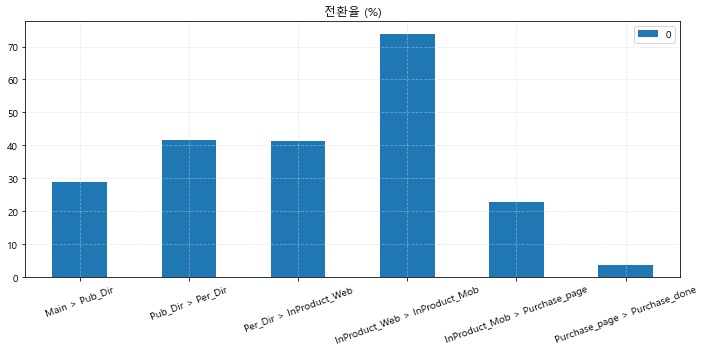

In [59]:
# create x labels
fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 6]

pd.DataFrame(conver_rt, index=fun_label).plot.bar(figsize=(10,5))
plt.title("전환율 (%)")
plt.xticks(rotation=20)
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

## 중간 정리
- 일별 주요 통계
    - 활성화 세션의 경우 주말에 감소하고 주중에 증가하는 트렌드 보임
    - 확장자별 1 tier에는 pdf, xls, doc가 포지셔닝되며, 2 tier에는 hwp, ppt가 포함됨
    - 문서의 이용 위치는 'other app' 이 압도적으로 높음
    - 스크린별로 사용성 파악 결과, 메인(main) 화면이 가장 많이 노출되며 다음 화면(pub_dir or per_dir)으로 넘어가는 경우 많지 않음
    
- 구간별 전환율

    - 전환율이 가장 낮은 구간(=이탈이 가장 높은 구간)은 구매정보 페이지에서 구매 완료 페이지로 전환하는 구간임(3.7%)
    - 제품내 웹 -> 앱으로 전환하는 구간은 전환율이 양호함(74%)

# 클러스터 별 전환율 차이

In [70]:
df_ext = df[df.actiontype=='OPEN'].groupby(['sessionid','ext']).size().unstack().fillna(0)

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(df_ext)

KMeans(n_clusters=4, random_state=42)

In [82]:
labels = kmeans.labels_

df_ext['group'] = labels
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [83]:
df_ext.group.value_counts()

0    37237
2    31758
1    30121
3    21541
Name: group, dtype: int64

In [84]:
df_ext_mean = df_ext.groupby('group').mean().round(2)
df_ext_mean

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
group,,,,,,,,
0,0.08,0.01,1.12,0.03,0.0,0.01,0.0,0.05
1,1.19,0.00,0.02,0.06,0.0,0.02,0.0,0.01
2,0.06,0.01,0.01,0.02,0.0,0.01,0.0,1.13
3,0.00,0.57,0.01,0.39,0.0,0.19,0.0,0.00


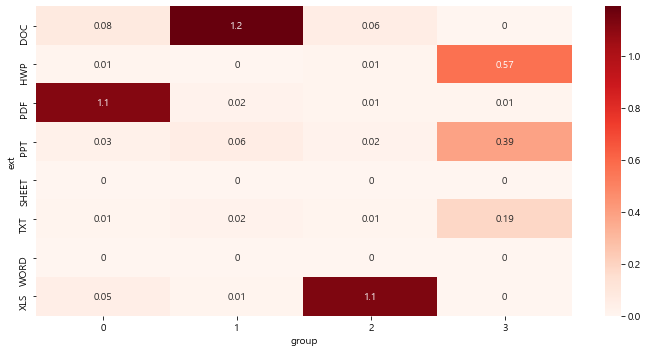

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(df_ext_mean.T, annot=True, cmap='Reds')
plt.tight_layout()

In [87]:
group_name = {0: 'gr_pdf',
              1: 'gr_doc',
              2: 'gr_xls',
              3: 'gr_hwp'}

df_ext['group'] = df_ext['group'].replace(group_name)

In [97]:
df_open = df[df.actiontype == 'OPEN']
df_cluster = pd.merge(df_open,df_ext[['group']].reset_index(), on='sessionid')
df_cluster.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,요일,group
0,0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,0,gr_pdf
1,2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,0,gr_pdf
2,4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,2,gr_pdf
3,7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,2,gr_pdf
4,8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,3,gr_pdf


In [98]:
def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]\
                     .groupby(["datetime", "screen"])['sessionid']\
                     .nunique().unstack().fillna(0).astype(int)
            
    conver_cnt = df_gr_screen.mean().astype('int').sort_values(ascending=False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100 for i in range(len(conver_cnt)) if i < 5]
    fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 5]
    conver_rt = pd.Series(conver_rt, index=fun_label).fillna(0)
    
    return conver_rt

In [103]:
conv_rt_pdf = conv_rt_by_grp('gr_pdf')
conv_rt_doc = conv_rt_by_grp('gr_doc')
conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_hwp = conv_rt_by_grp('gr_hwp')

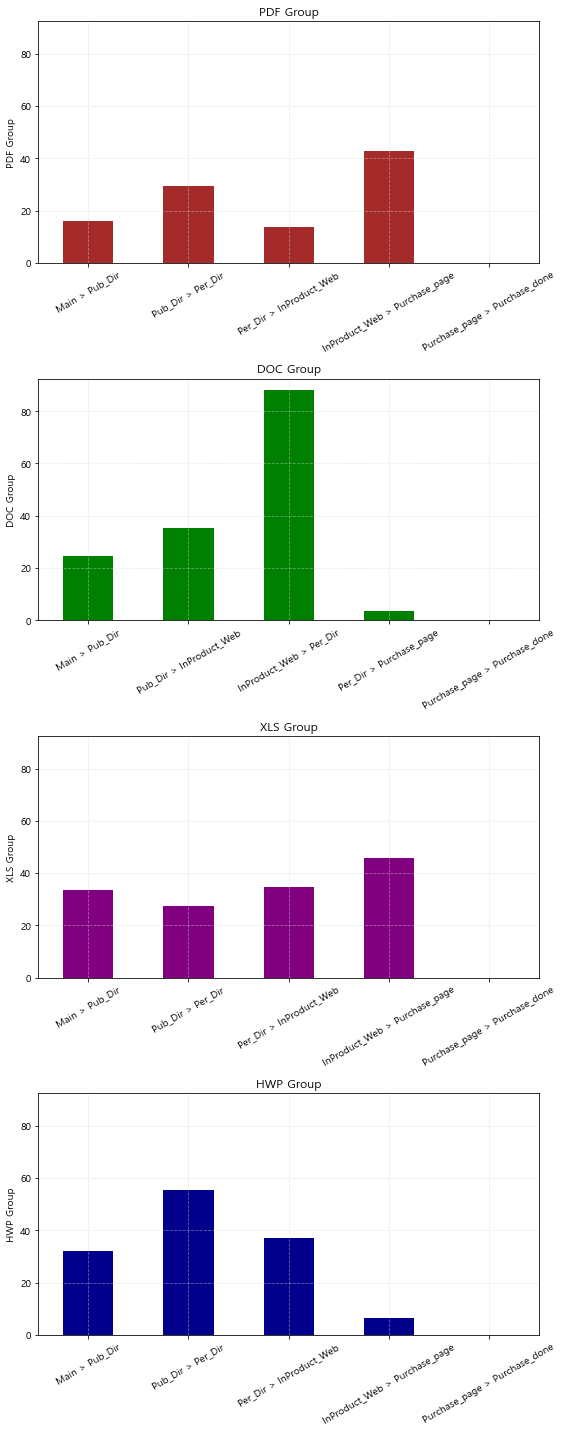

In [104]:

fig, ax = plt.subplots(4, 1, figsize=(8,20), sharey=True)

conv_rt_pdf.plot(kind='bar', ax=ax[0], color = 'brown', rot=30)
ax[0].set_title('PDF Group')
ax[0].set_ylabel('PDF Group')
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_doc.plot(kind='bar', ax=ax[1], color = 'green', rot=30)
ax[1].set_ylabel('DOC Group')
ax[1].set_title('DOC Group')
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_xls.plot(kind='bar', ax=ax[2], color = 'purple', rot=30)
ax[2].set_ylabel('XLS Group')
ax[2].set_title('XLS Group')
ax[2].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_hwp.plot(kind='bar', ax=ax[3], color = 'darkblue', rot=30)
ax[3].set_ylabel('HWP Group')
ax[3].set_title('HWP Group')
ax[3].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

### note
- 클러스터 별 전환율 차이
    - XLS 그룹: 전반적으로 전환이 유사한 수준으로 진행되나, purchase_page 에서 실 구매로 이어지지 않음
    - DOC 그룹: inproduct_web -> per_dir 으로 전환율은 높으나, per_dir -> purchase_page 구간의 이탈이 두드러짐
    - PDF 그룹: 전반적인 구간에서 전화율이 고르게 낮은 편임. 특히 per_dir -> inproduct_web으로 전환하는 비율이 낮음
    - HWP 그룹: inproduct web -> purchase_page 구간의 이탈이 심한 경향을 보임

In [106]:
# 그룹별 평균 전환율
gr_pdf_avg = conv_rt_pdf.replace(0, np.nan).mean()
gr_doc_avg = conv_rt_doc.replace(0, np.nan).mean()
gr_xls_avg = conv_rt_xls.replace(0, np.nan).mean()
gr_hwp_avg = conv_rt_hwp.replace(0, np.nan).mean()

print("pdf", gr_pdf_avg)
print("doc", gr_doc_avg)
print("xls", gr_xls_avg)
print("hwp", gr_hwp_avg)

pdf 25.489864968816832
doc 37.85502552985396
xls 35.359828800739066
hwp 32.741991670438274


In [108]:
# 가중치 임의 설정
weights = [1, 1.3, 1.5, 2, 2.5]

# 가중 평균
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg

gr_pdf_w = weight_avg(conv_rt_pdf)
gr_doc_w = weight_avg(conv_rt_doc)
gr_xls_w = weight_avg(conv_rt_xls)
gr_hwp_w = weight_avg(conv_rt_hwp)

print("pdf:", gr_pdf_w)
print("doc:", gr_doc_w)
print("xls:", gr_xls_w)
print("hwp:", gr_hwp_w)

pdf: 32.09449025574505
doc: 41.883746148516025
xls: 42.582192967261385
hwp: 34.49355582697327


In [109]:
avg_df = pd.DataFrame(list(zip([gr_pdf_avg, gr_doc_avg, gr_xls_avg, gr_hwp_avg],\
                                   [gr_pdf_w, gr_doc_w, gr_xls_w, gr_hwp_w])), \
                                   columns = ['mean', 'wg_mean'],\
                                   index = ['gr_pdf', 'gr_doc', 'gr_xls', 'gr_hwp'])

avg_df

,mean,wg_mean
gr_pdf,25.489865,32.094490
gr_doc,37.855026,41.883746
gr_xls,35.359829,42.582193
gr_hwp,32.741992,34.493556


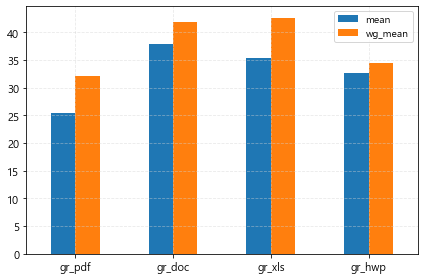

In [110]:
avg_df.plot.bar(fontsize=11, rot=0)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### note
- 전환율 개선 Target 그룹
    - 구간별 가중치를 고려할 경우, 평균 전환율이 가장 낮은 구간은 pdf 사용그룹이므로 개선이 가장 시급한 그룹으로 고려됨
    - XLS 및 DOC 그룹은 상대적으로 양호한 전환율을 보이고 있음. (단, 전환율 상승 지속 노력 필요함)


# 결론

## 현황
- 주말 대비 주중의 사용성 높음 (세션수 기준)
- doc, pdf, xls 확장자가 주요 항목
- 전체적으로 구매정보 -> 구매결제로 이어지는 전환율이 낮아(3.7%) 개선이 시급함
- 바로 전단계인 제품내 -> 구매정보로의 전환율 역시 낮은 편임(23%)


## 시사점
- 클러스터링 결과 PDF 사용 그룹의 전환율 상대적으로 낮아 원인 파악 필요(24%, 타그룹 평균 약35%)
- 모든 funnel 단계에서 전환율 전반적으로 낮음 (약 20%대)
- 개선 우선순위가 가장 높은(핵심)그룹으로 고려 가능
- PDF 관련 기능 검토 필요 (안정성 등)
